In [2]:
# 查看数据文件目录  list datalab files
!ls datalab/

231715


In [3]:
# 查看个人永久空间文件  list files in your permanent storage
!ls /home/tianchi/myspace/


 high_diamond_ranked_10min.csv	'Untitled Folder'


In [5]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

Package                       Version  
----------------------------- ---------
absl-py                       0.2.2    
alabaster                     0.7.11   
alembic                       0.9.9    
altair                        1.2.0    
arrow                         0.12.1   
asn1crypto                    0.24.0   
astor                         0.6.2    
attrs                         18.1.0   
Babel                         2.5.3    
backcall                      0.1.0    
backports.functools-lru-cache 1.5      
beautifulsoup4                4.6.0    
blaze                         0.10.1   
bleach                        1.5.0    
blinker                       1.4      
bokeh                         0.12.16  
boto                          2.48.0   
boto3                         1.7.48   
botocore                      1.10.48  
bunch                         1.0.1    
bz2file                       0.98     
certifi                       2019.6.16
cffi                          1.11.5   


In [ ]:
# 安装扩展包时请使用阿里云镜像源  install packages
!pip install pyodps -i "https://mirrors.aliyun.com/pypi/simple/"

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [ ]:
# 绘图案例 an example of matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from IPython.display import display, clear_output
import time
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

for n in range(1,10):
    time.sleep(1)
    ax.plot(x, jn(x,n))
    clear_output(wait=True)
    display(f)

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()

## 学习目标

- 了解 逻辑回归 的理论
- 掌握 逻辑回归 的 sklearn 函数调用使用并将其运用到鸢尾花数据集预测
- LR原理介绍


## 代码实践

- Part1 Demo实践

    Step1:库函数导入
 
    Step2:模型训练 
 
     Step3:模型参数查看 

     Step4:数据和模型可视化 
 
     Step5:模型预测

- Part2 基于鸢尾花（iris）数据集的逻辑回归分类实践

     Step1:库函数导入
 
     Step2:数据读取/载入
 
     Step3:数据信息简单查看 
 
     Step4:可视化描述 
 
     Step5:利用 逻辑回归模型 在二分类上 进行训练和预测 
 
     Step6:利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测
 

### - Part1 Demo实践

#### Step1：库函数导入

In [1]:
##  基础函数库
import numpy as np 

## 导入画图库
import matplotlib.pyplot as plt
import seaborn as sns

## 导入逻辑回归模型函数
from sklearn.linear_model import LogisticRegression

#### Step2：训练模型

Demo示例拟合的model $y=w_0+w_1*x_1+w_2*x_2$

In [2]:
##Demo演示LogisticRegression分类

## 构造数据集
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

## 调用逻辑回归模型
lr_clf = LogisticRegression()

## 用逻辑回归模型拟合构造的数据集
lr_clf = lr_clf.fit(x_fearures, y_label) 

#### Step3：模型参数查看

In [3]:
##查看其对应模型的w
print('the weight of Logistic Regression:',lr_clf.coef_)
##查看其对应模型的w0
print('the intercept(w0) of Logistic Regression:',lr_clf.intercept_)


the weight of Logistic Regression: [[ 0.73462087  0.6947908 ]]
the intercept(w0) of Logistic Regression: [-0.03643213]


#### Step4：数据和模型可视化

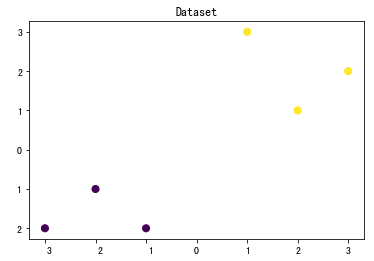

In [5]:
## 可视化构造的数据样本点
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')
plt.show()

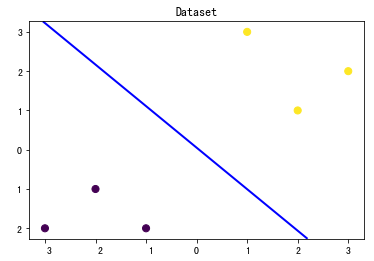

In [6]:
# 可视化决策边界
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))

z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
z_proba = z_proba[:, 1].reshape(x_grid.shape)
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

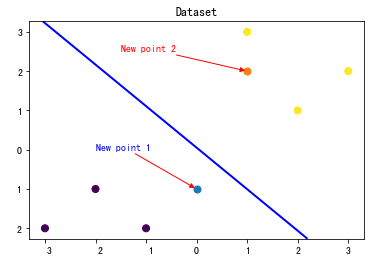

In [8]:
### 可视化预测新样本

plt.figure()
## new point 1
x_fearures_new1 = np.array([[0, -1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## 训练样本
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

#### Step5：模型预测

In [9]:
##在训练集和测试集上分布利用训练好的模型进行预测
y_label_new1_predict=lr_clf.predict(x_fearures_new1)
y_label_new2_predict=lr_clf.predict(x_fearures_new2)
print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)
##由于逻辑回归模型是概率预测模型（前文介绍的p = p(y=1|x,\theta)）,所有我们可以利用predict_proba函数预测其概率
y_label_new1_predict_proba=lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba=lr_clf.predict_proba(x_fearures_new2)
print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)

The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]
The New point 1 predict Probability of each class:
 [[ 0.67507358  0.32492642]]
The New point 2 predict Probability of each class:
 [[ 0.11029117  0.88970883]]


可以发现训练好的回归模型将X_new1预测为了类别0（判别面左下侧），X_new2预测为了类别1（判别面右上侧）。其训练得到的逻辑回归模型的概率为0.5的判别面为上图中蓝色的线。

### 基于鸢尾花（iris）数据集的逻辑回归分类实践

#### 函数库导入  


In [1]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

本次我们选择鸢花数据（iris）进行方法的尝试训练，该数据集一共包含5个变量，其中4个特征变量，1个目标分类变量。共有150个样本，目标变量为 花的类别 其都属于鸢尾属下的三个亚属，分别是山鸢尾 (Iris-setosa)，变色鸢尾(Iris-versicolor)和维吉尼亚鸢尾(Iris-virginica)。包含的三种鸢尾花的四个特征，分别是花萼长度(cm)、花萼宽度(cm)、花瓣长度(cm)、花瓣宽度(cm)，这些形态特征在过去被用来识别物种。

#### Step2：数据读取/载入

In [2]:
##我们利用sklearn中自带的iris数据作为数据载入，并利用Pandas转化为DataFrame格式
from sklearn.datasets import load_iris
data = load_iris() #得到数据特征
iris_target = data.target #得到数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式

#### Step3：数据信息简单查看

In [4]:
##利用.info()查看数据的整体信息
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
##进行简单的数据查看，我们可以利用.head()头部.tail()尾部
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_features.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
##其对应的类别标签为，其中0，1，2分别代表'setosa','versicolor','virginica'三种不同花的类别

iris_target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
##利用value_counts函数查看每个类别数量

pd.Series(iris_target).value_counts()

2    50
1    50
0    50
dtype: int64

In [15]:
##对于特征进行一些统计描述

iris_features.describe()  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


####  Step4:可视化描述



In [10]:
## 合并标签和特征信息
iris_all = iris_features.copy() ##进行浅拷贝，防止对于原始数据的修改
iris_all['target'] = iris_target  

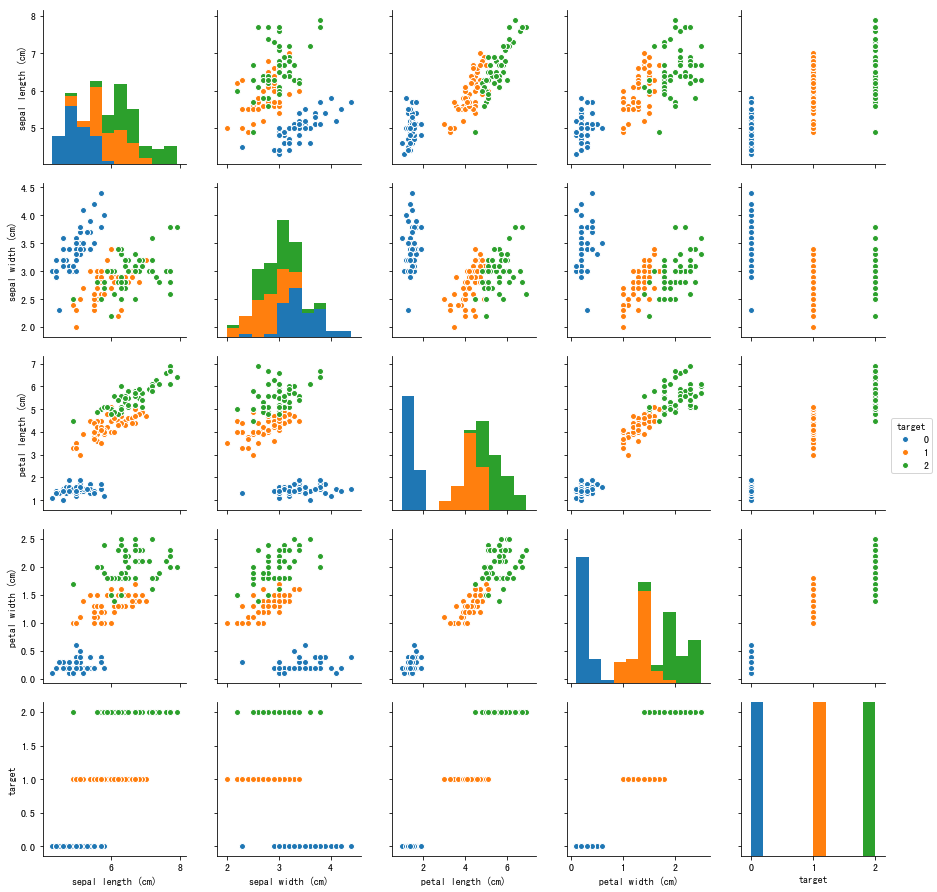

In [11]:
## 特征与标签组合的散点可视化
sns.pairplot(data=iris_all,diag_kind='hist', hue= 'target')
plt.show()

利用箱型图我们也可以得到不同类别在不同特征上的分布差异情况

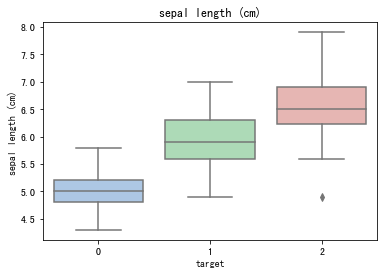

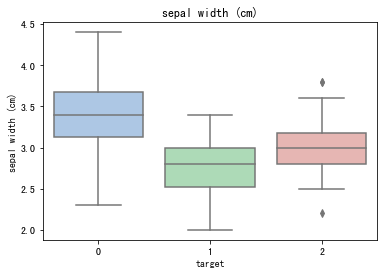

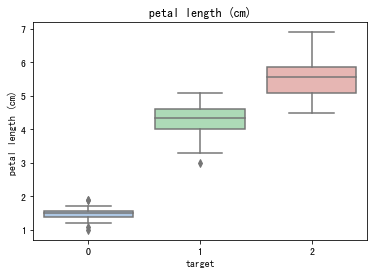

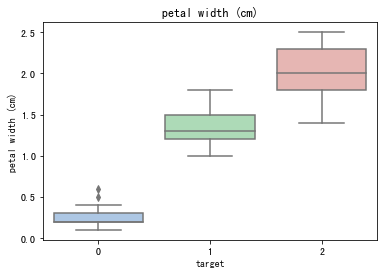

In [12]:
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5, 
palette='pastel', data=iris_all)
    plt.title(col)
    plt.show() 

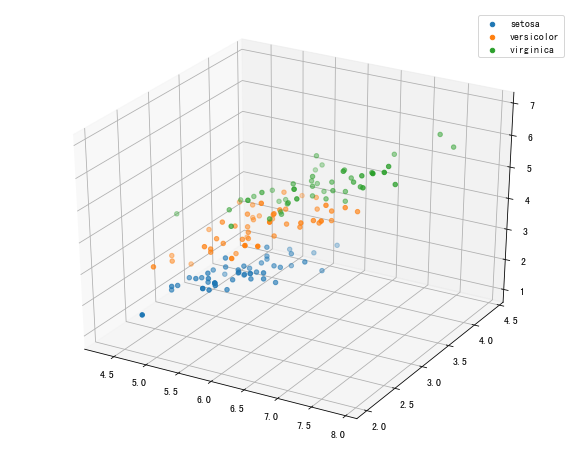

In [16]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2],label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2],label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2],label='virginica')
plt.legend()

plt.show()  

####  Step5:利用 逻辑回归模型 在二分类上 进行训练和预测

In [17]:
##为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split
##选择其类别为0和1的样本（不包括类别为2的样本）
iris_features_part=iris_features.iloc[:100]
iris_target_part=iris_target[:100]
##测试集大小为20%，80%/20%分
x_train,x_test,y_train,y_test=train_test_split(iris_features_part,iris_target_part,test_size=0.2,random_state=2020) 

In [18]:
##从sklearn中导入逻辑回归模型
from sklearn.linear_model import LogisticRegression  

In [19]:
##定义逻辑回归模型
clf=LogisticRegression(random_state=0,solver='lbfgs')

In [20]:
##在训练集上训练逻辑回归模型
clf.fit(x_train,y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
##查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)

##查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)   


the weight of Logistic Regression: [[ 0.45244919 -0.81010583  2.14700385  0.90450733]]
the intercept(w0) of Logistic Regression: [-6.57504448]


In [22]:
##在训练集和测试集上分布利用训练好的模型进行预测
train_predict=clf.predict(x_train)
test_predict=clf.predict(x_test)

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


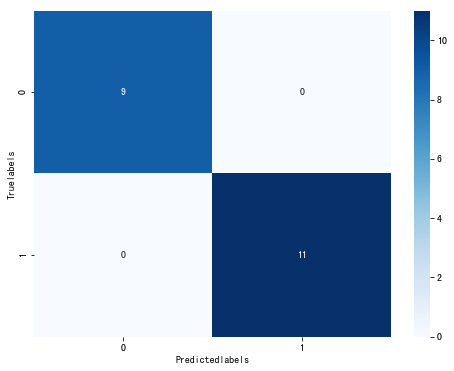

In [23]:
from sklearn import metrics
##利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

##查看混淆矩阵(预测值和真实值的各类情况统计矩阵)
confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

##利用热力图对于结果进行可视化
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('Predictedlabels')
plt.ylabel('Truelabels')
plt.show()

#### Step6:利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测

In [24]:
##测试集大小为20%，80%/20%分
x_train,x_test,y_train,y_test=train_test_split(iris_features,iris_target,test_size=0.2,random_state=2020)

In [25]:
##定义逻辑回归模型
clf=LogisticRegression(random_state=0,solver='lbfgs')  

In [26]:
##在训练集上训练逻辑回归模型
clf.fit(x_train,y_train)   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
##查看其对应的w
print('the weight of Logistic Regression:\n',clf.coef_)
##查看其对应的w0
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)
##由于这个是3分类，所有我们这里得到了三个逻辑回归模型的参数，其三个逻辑回归组合起来即可实现三分类

the weight of Logistic Regression:
 [[-0.43538857  0.87888013 -2.19176678 -0.94642091]
 [-0.39434234 -2.6460985   0.76204684 -1.35386989]
 [-0.00806312  0.11304846  2.52974343  2.3509289 ]]
the intercept(w0) of Logistic Regression:
 [  6.30620875   8.25761672 -16.63629247]


In [29]:
##在训练集和测试集上分布利用训练好的模型进行预测
train_predict=clf.predict(x_train)
test_predict=clf.predict(x_test)
##由于逻辑回归模型是概率预测模型（前文介绍的p=p(y=1|x,\theta)）,所有我们可以利用predict_proba函数预测其概率

train_predict_proba=clf.predict_proba(x_train)
test_predict_proba=clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)
##其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

##利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[  1.32525870e-04   2.41745142e-01   7.58122332e-01]
 [  7.02970475e-01   2.97026349e-01   3.17667822e-06]
 [  3.37367886e-02   7.25313901e-01   2.40949311e-01]
 [  5.66207138e-03   6.53245545e-01   3.41092383e-01]
 [  1.06817066e-02   6.72928600e-01   3.16389693e-01]
 [  8.98402870e-04   6.64470713e-01   3.34630884e-01]
 [  4.06382037e-04   3.86192249e-01   6.13401369e-01]
 [  1.26979439e-01   8.69440588e-01   3.57997319e-03]
 [  8.75544317e-01   1.24437252e-01   1.84312617e-05]
 [  9.11209514e-01   8.87814689e-02   9.01671605e-06]
 [  3.86067682e-04   3.06912689e-01   6.92701243e-01]
 [  6.23261939e-03   7.19220636e-01   2.74546745e-01]
 [  8.90760124e-01   1.09235653e-01   4.22292409e-06]
 [  2.32339490e-03   4.47236837e-01   5.50439768e-01]
 [  8.59945211e-04   4.22804376e-01   5.76335679e-01]
 [  9.24814068e-01   7.51814638e-02   4.46852786e-06]
 [  2.01307999e-02   9.35166320e-01   4.47028801e-02]
 [  1.71215635e-02   5.07246971e-01  

The confusion matrix result:
 [[10  0  0]
 [ 0  7  3]
 [ 0  3  7]]


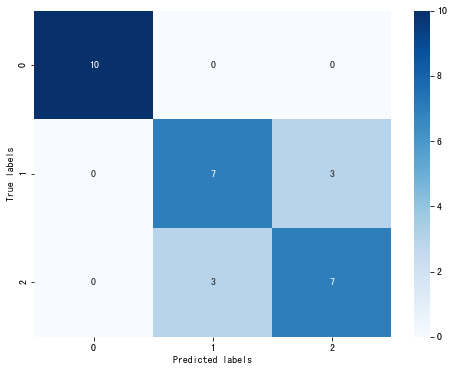

In [30]:
##查看混淆矩阵
confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

##利用热力图对于结果进行可视化
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### LR原理介绍

#### LR模型介绍

逻辑回归假设数据服从伯努利分布,通过极大化似然函数的方法，运用梯度下降来求解参数，来达到将数据二分类的目的

#### 逻辑回归的基本假设  
任何的模型都是有自己的假设，在这个假设下模型才是适用的。逻辑回归的第一个基本假设是假设数据服从伯努利分布。  

- 在逻辑回归这个模型里面是假设$h_\theta(x)$为样本为正的概率，$1-h_\theta(x)$为样本为负的概率。那么整个模型可以描述为
$$h_\theta(x;\theta)=p$$
- 逻辑回归的第二个假设是假设样本为正的概率是 
$$p=\frac{1}{1+e^{-\theta^T x}}$$
- LR模型的最终形式
$$h_\theta(x;\theta)=\frac{1}{1+e^{-\theta^T x}}$$

#### 逻辑回归的损失函数

逻辑回归的损失函数是它的极大似然函数  

$$
L_{\theta}(x)=\prod_{i=1}^{m} h_{\theta}\left(x^{i} ; \theta\right)^{y i} *\left(1-h_{\theta}\left(x^{i} ; \theta\right)\right)^{1-y^{i}}
$$


#### 逻辑回归的损失函数为什么要使用极大似然函数作为损失函数？ 

损失函数一般有四种，平方损失函数，对数损失函数，HingeLoss0-1损失函数，绝对值损失函数。将极大似然函数取对数以后等同于对数损失函数。在逻辑回归这个模型下，对数损失函数的训练求解参数的速度是比较快的。

梯度更新公式:
$$ \theta_j=\theta_j- (y_i - h_\theta(x_i;\theta))* x_{ij}$$
这个式子的更新速度只和$x_{ij}$，$y_j$相关。和sigmod函数本身的梯度是无关的。这样更新的速度是可以自始至终都比较的稳定。
为什么不选平方损失函数的呢？其一是因为如果你使用平方损失函数，你会发现梯度更新的速度和sigmod函数本身的梯度是很相关的。sigmod函数在它在定义域内的梯度都不大于0.25。这样训练会非常的慢。

#### 梯度下降方法求解

$$
\begin{aligned}
\frac{\partial J(w)}{w_{j}} &=-\sum_{i=1}^{n}\left(y^{(i)} \frac{1}{\phi\left(z^{(i)}\right)}-\left(1-y^{(i)}\right) \frac{1}{1-\phi\left(z^{(i)}\right)}\right) \frac{\partial \phi\left(z^{(i)}\right)}{\partial w_{j}} \\
&=-\sum_{i=1}^{n}\left(y^{(i)} \frac{1}{\phi\left(z^{(i)}\right)}-\left(1-y^{(i)}\right) \frac{1}{1-\phi\left(z^{(i)}\right)}\right) \phi\left(z^{(i)}\right)\left(1-\phi\left(z^{(i)}\right)\right) \frac{\partial z^{(i)}}{\partial w_{j}} \\
&=-\sum_{i=1}^{n}\left(y^{(i)}\left(1-\phi\left(z^{(i)}\right)\right)-\left(1-y^{(i)}\right) \phi\left(z^{(i)}\right)\right) x_{j}^{(i)} \\
&=-\sum_{i=1}^{n}\left(y^{(i)}-\phi\left(z^{(i)}\right)\right) x_{j}^{(i)}
\end{aligned}
$$